# <span style="color:turquoise">Coursera Course Dataset Analysis</span>

#### <span style="color:black">In this project I analyzed the Coursera course Dataset thoroughly and carefully. Although there are only limited features for this dataset, there are so many outcomes to deduce and things to figure out. The fact that Coursera is a very popular platform was a major drive for me to dig this dataset up even more and had lots of fun while doing so. I have had some conclusions that are valuable for both research and bussiness aspects and I hope you can enjoy it as much as I did!</span>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from langdetect import detect

**Lets read, convert into a data frame, and take a look at the data.**

In [2]:
data = pd.read_csv('coursea_data.csv', index_col='course_title')
del data['Unnamed: 0']
data.head()

,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
course_title,,,,,
(ISC)² Systems Security Certified Practitioner (SSCP),(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
A Crash Course in Causality: Inferring Causal Effects from Observational Data,University of Pennsylvania,COURSE,4.7,Intermediate,17k
A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k


**Lets see how big is this dataset**

In [3]:
print(f'This dataset has {data.shape[1]} features')

This dataset has 5 features


In [4]:
print(f'This dataset has {data.shape[0]} observations')

This dataset has 891 observations


In [5]:
print(f'In total this gives us a database of {data.shape[0]*data.shape[1]} values')

In total this gives us a database of 4455 values


**Lets check for null values in our data**

In [6]:
data.isnull().sum()

course_organization         0
course_Certificate_type     0
course_rating               0
course_difficulty           0
course_students_enrolled    0
dtype: int64

**Checking for duplicated values in our data**

In [7]:
data[data.duplicated()]

,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
course_title,,,,,
Databases and SQL for Data Science,IBM,COURSE,4.7,Beginner,110k
Foundations of Global Health,Johns Hopkins University,SPECIALIZATION,4.7,Beginner,31k
Positive Psychology: Applications and Interventions,University of Pennsylvania,COURSE,4.8,Beginner,23k
Security in Google Cloud Platform,Google Cloud,SPECIALIZATION,4.7,Intermediate,300k
Sexualidad...mucho más que sexo,Universidad de los Andes,COURSE,4.8,Beginner,110k
"Sleep: Neurobiology, Medicine, and Society",University of Michigan,COURSE,4.8,Beginner,20k
Supply Chain Principles,Georgia Institute of Technology,COURSE,4.6,Mixed,29k
Think Again I: How to Understand Arguments,Duke University,COURSE,4.6,Beginner,200k
U.S. Federal Taxation,University of Illinois at Urbana-Champaign,SPECIALIZATION,4.8,Intermediate,12k


**Lets get rid of those!**

In [8]:
data = data.drop_duplicates()

In [9]:
len(data[data.duplicated()])

0

**So far there seems to be only 1 numerical column but "course_students_enrolled" should also be like that.**

In [10]:
data.describe()

,course_rating
count,882.000000
mean,4.676871
std,0.162794
min,3.300000
25%,4.600000
50%,4.700000
75%,4.800000
max,5.000000


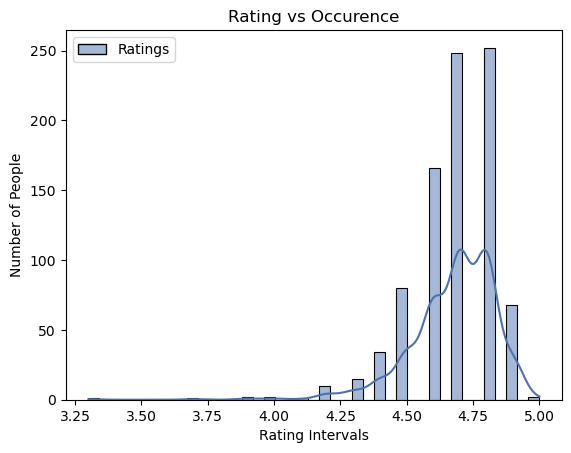

In [11]:
sns.set_palette('deep')
ax = sns.histplot(data, kde=True)
legend = plt.gca().get_legend()
legend.get_texts()[0].set_text('Ratings')
plt.title('Rating vs Occurence')
plt.ylabel('Number of People')
plt.xlabel('Rating Intervals');

**In this graph you can see the distribution of the ratings that were given by the users and we see that there is a sudden peak from approximately 4.7 to 4.8**

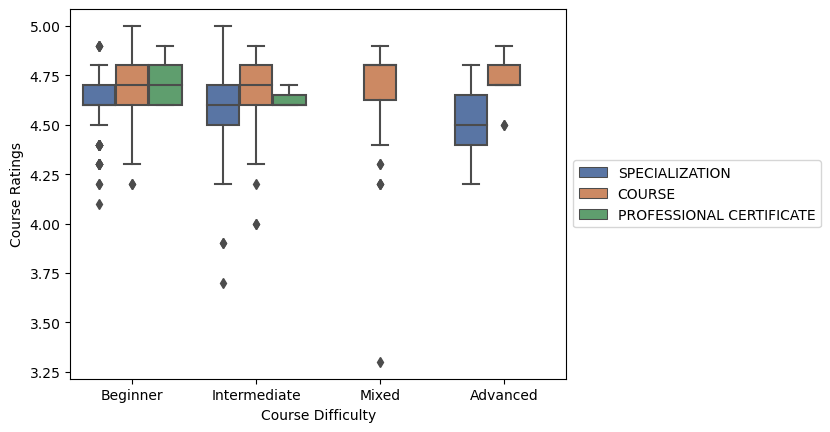

In [12]:
sns.boxplot(data=data, x='course_difficulty', y='course_rating',hue='course_Certificate_type')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Course Difficulty')
plt.ylabel('Course Ratings');

**Things to consider in the last graph:**
* There are a couple of outliers.
* Ratings of each type and diffuculty.
* There aren't any adcanced and mixed proffesional certificates (Ironically).
* There are only courses which are in mixed difficulty.
* Specialization type of course has the greatest range among intermediate values and therefore the whole graph.

In [13]:
def convert_to_numeric(value):#add type hints
    if value.endswith('k'):
        return float(value[:-1]) * 1_000
    
    return float(value[:-1]) * 1_000_000
data['course_students_enrolled'] = data['course_students_enrolled'].apply(convert_to_numeric)

**As mentioned before we should convert the "course_students_enrolled" from string to a float by accurate conversion for data to still make sense and also graph it in a more useful way.**

In [14]:
data['course_students_enrolled'].head(10)

course_title
(ISC)² Systems Security Certified Practitioner (SSCP)                               5300.0
A Crash Course in Causality:  Inferring Causal Effects from Observational Data     17000.0
A Crash Course in Data Science                                                    130000.0
A Law Student's Toolkit                                                            91000.0
A Life of Happiness and Fulfillment                                               320000.0
ADHD: Everyday Strategies for Elementary Students                                  39000.0
AI For Everyone                                                                   350000.0
AI For Medical Treatment                                                            2400.0
AI Foundations for Everyone                                                        61000.0
AI for Medical Diagnosis                                                           12000.0
Name: course_students_enrolled, dtype: float64

**What is the most common course?**

In [15]:
data.course_students_enrolled.idxmax() #VERY textual include more graphs

'Machine Learning'

**what is the least common course?**

In [16]:
data.course_students_enrolled.idxmin()

'El Abogado del Futuro: Legaltech y la Transformación Digital del Derecho'

**Which course has the highest rating?**

In [17]:
data.course_rating.idxmax()

'El Abogado del Futuro: Legaltech y la Transformación Digital del Derecho'

**Which course has the lowest rating?**

In [18]:
data.course_rating.idxmin()

'How To Create a Website in a Weekend! (Project-Centered Course)'

**Which difficulties are more preferred?**

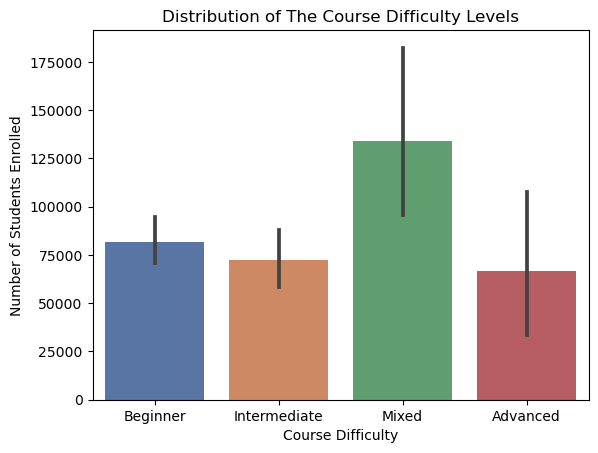

In [19]:
sns.barplot(data=data, x='course_difficulty', y='course_students_enrolled')
plt.title('Distribution of The Course Difficulty Levels')
plt.xlabel('Course Difficulty')
plt.ylabel('Number of Students Enrolled');

***This graph summarizes the distribution of students among the difficulties of the courses.***

**Which certificate type is more preferred?**

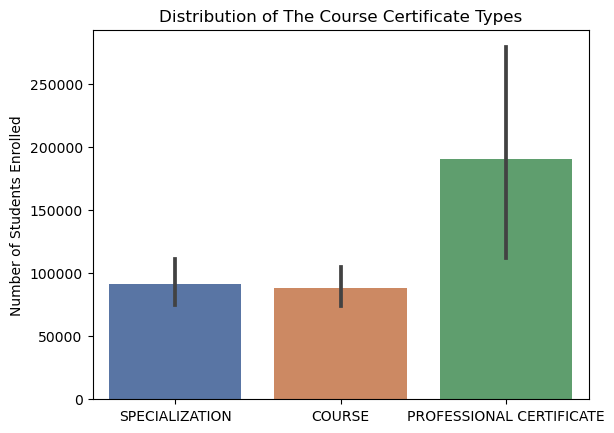

In [20]:
sns.barplot(data=data, x='course_Certificate_type', y='course_students_enrolled')
plt.title('Distribution of The Course Certificate Types')
plt.xlabel('')
plt.ylabel('Number of Students Enrolled');

***This graph summarizes the distribution of students among the types of the courses.***

**Which organization is the top rated?**

In [21]:
max_index = data.course_rating.idxmax()
data.loc[max_index, 'course_organization']


'Universidad Austral'

**Something doesn't add up lets try to see the top rated organization excluding 'Universidad Austral'**

In [22]:
max_index = data[data['course_organization'] != 'Universidad Austral']['course_rating'].idxmax()
data.loc[max_index, 'course_organization']


'Imperial College London'

**Which organization is the least rated?**

In [23]:
min_index = data.course_rating.idxmin()
data.loc[min_index, 'course_organization']

'The State University of New York'

**What is the most popular organization?**

In [24]:
max_index = data.course_students_enrolled.idxmax()
data.loc[max_index, 'course_organization']

course_title
Machine Learning    University of Washington
Machine Learning         Stanford University
Name: course_organization, dtype: object

**What is the least popular organization?**

In [25]:
min_index = data.course_students_enrolled.idxmin()
data.loc[min_index, 'course_organization']

'Universidad Austral'

**Lets get a into a different dimension in our data and categorize it into course languages by the help of langdetect**

In [26]:
def detect_language(text):
    try:
        return detect(text)
    except:#very broad
        return 'Unknown'
data['index'] = data.index
data['Language of the course'] = data['index'].apply(detect_language)
data['Language of the course'].head()

course_title
(ISC)² Systems Security Certified Practitioner (SSCP)                             en
A Crash Course in Causality:  Inferring Causal Effects from Observational Data    en
A Crash Course in Data Science                                                    en
A Law Student's Toolkit                                                           en
A Life of Happiness and Fulfillment                                               en
Name: Language of the course, dtype: object

**Now that we know the language we can see which language is more popular or has the highest rating or vice versa.**

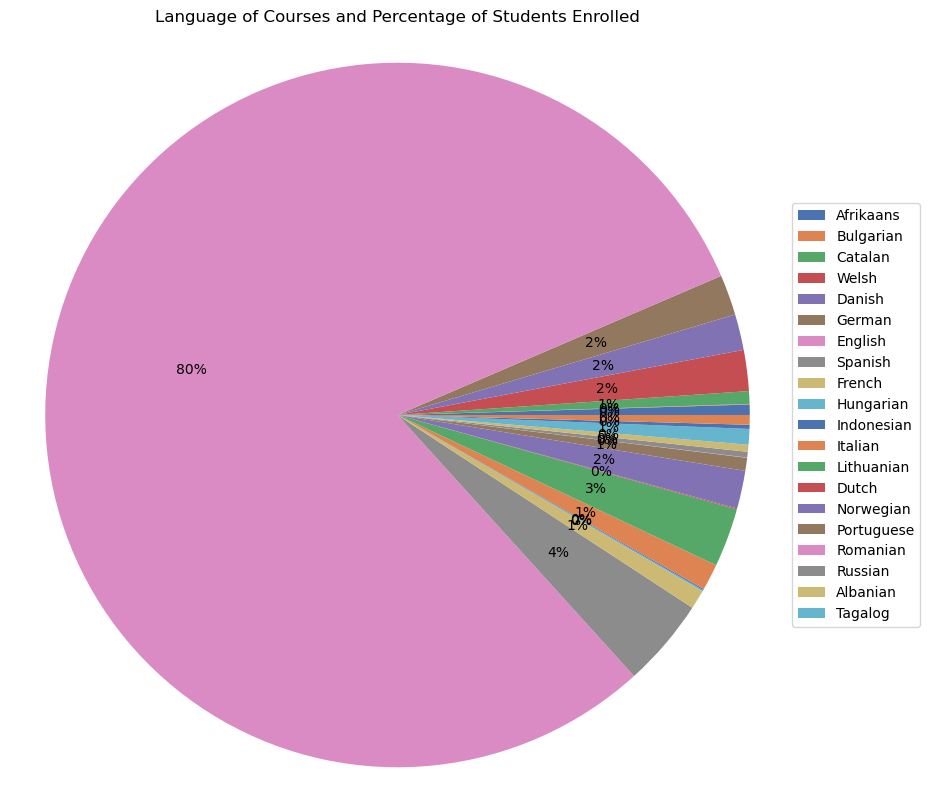

In [27]:
plt.figure(figsize=(10,10))
df_grouped = data.groupby('Language of the course').sum(numeric_only=False).reset_index()
plt.pie(df_grouped['course_students_enrolled'],labels= None, autopct='%.0f%%')
plt.rcParams['font.size'] = 10
plt.axis('equal')
plt.legend(df_grouped['Language of the course'], loc='best')
#langcodes library
custom_labels = ['Afrikaans', 'Bulgarian', 'Catalan', 'Welsh','Danish','German','English', 'Spanish', 'French','Hungarian','Indonesian', 'Italian', 'Lithuanian', 'Dutch', 'Norwegian', 'Portuguese', 'Romanian','Russian', 'Albanian', 'Tagalog']
plt.legend(custom_labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Language of Courses and Percentage of Students Enrolled');

**Which language is the most popular?**

In [28]:
mask = data.groupby('Language of the course').sum(numeric_only=False)
mask['course_students_enrolled'].idxmax()

'en'

**'en' is the code for the English language**

**Which language is the least popular?**

In [29]:
mask = data.groupby('Language of the course').sum(numeric_only=False)
mask['course_students_enrolled'].idxmin()

'pl'

**'bg' is the code for Bulgarian language**

# <span style="color:crimson">Conclusion</span>

**There are many outcomes that could be deduced from this dataset and I am probably only scratching the surface here but I hope I was able to communicate the popularities, commonalities and some distinct details that were hidden in this dataset. Such as seeing bulgarian as the least popular language although there are some languages in the dataset which are used by way less people as well as the 'Universidad Austral' being the top rated just because it was the least attended and therefore  every vote had way more impact than others. These things can be misleading at first but after seeing "Imperial College London" when disregarded made me feel more comfortable about the result. It's astonishing to see human psychology clearly on the choices humans make collectively, although some of them are predictable, many are interesting enough for me to dig up this dataset even more. When it comes to the bussiness aspect I can confidently say that courses that use english are overwhelming majority and therefore it would be a great idea to make them more as well as courses from the more established organizations are rated higher and would be a great idea to increase them. Moreover professional certificates are more in demand along with the courses that are mixed in difficulty so you can obtain a big hit course if you would mix those in a course and present to the students.**